In [19]:
import ast
import networkx as nx
import importlib
import utils
import style
import graph
importlib.reload(utils)
importlib.reload(style)
importlib.reload(graph)
from utils import ast_to_networkx, node_transform
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from graph import OurGraph
import xml.dom.minidom

In [20]:
my_file = 'test.py'
with open(my_file, 'r') as file:
    code = file.read()

tree = ast.parse(code)

# Print the AST
print(ast.dump(tree))

Module(body=[FunctionDef(name='main', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[FunctionDef(name='plus', args=arguments(posonlyargs=[], args=[arg(arg='a'), arg(arg='b')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Return(value=BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load())))], decorator_list=[]), FunctionDef(name='minus', args=arguments(posonlyargs=[], args=[arg(arg='a'), arg(arg='b')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Return(value=BinOp(left=Name(id='a', ctx=Load()), op=Sub(), right=Name(id='b', ctx=Load())))], decorator_list=[]), Assign(targets=[Tuple(elts=[Name(id='x', ctx=Store()), Name(id='y', ctx=Store()), Name(id='z', ctx=Store()), Name(id='w', ctx=Store())], ctx=Store())], value=Tuple(elts=[Constant(value=1), Constant(value=2), Constant(value=3), Constant(value=4)], ctx=Load())), Assign(targets=[Name(id='res', ctx=Store())], value=Call(func=Name(id='plus', ctx=Load()), args

In [21]:
# astor.to_source(tree)

In [22]:
G = ast_to_networkx(tree)

/var/folders/gl/5pxh7s9n19vfr9kxhf29vxyc0000gq/T/ipykernel_17008/3508742943.py:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


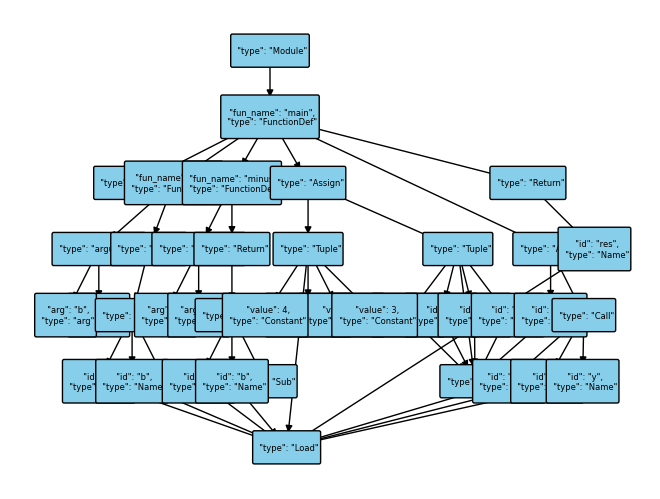

In [23]:
def visualize_ast(filename):
    with open(filename, 'r') as file:
        code = file.read()

    tree = ast.parse(code)
    G = ast_to_networkx(tree)

    node_labels = ({node: node_transform(G, node) for node in G.nodes()})
    pos = graphviz_layout(G, prog="dot")
    pos = {k: (x, 10*y) for k, (x, y) in pos.items()}
    node_size = [(len(node_transform(G, n))+20)*6 for n in G.nodes()]
    nx.draw(G, pos=pos, with_labels=True, node_size=node_size, labels=node_labels, node_shape="s", arrows = True, node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round,pad=0.2'), font_size=6)

    plt.show()
visualize_ast('test.py')

In [24]:
graph = OurGraph.from_file('test.py')

In [29]:
importlib.reload(style)
from style import OurGraphToXML
import os 

mxfile = OurGraphToXML(y_scaling=1.1).graph_to_xml(graph)
xml_str = xml.dom.minidom.parseString(ET.tostring(mxfile)).toprettyxml()

filename = 'output'
with open(f'{filename}.drawio', 'w') as file:
    file.write(xml_str)
    
# DRAWIO="/Applications/draw.io.app/Contents/MacOS/draw.io"

# bashCommand = f"/Applications/draw.io.app/Contents/MacOS/draw.io -x -f png --scale 5   -o output.png output.drawio"
# os.system(bashCommand) 
        
# print(xml_str)


In [26]:
mxfile = ET.Element('mxfile', host="65bd71144e")

# Create diagram element
diagram = ET.SubElement(mxfile, 'diagram', id="RFndyrCF2-3MIdXtw8gX", name="Page-1")

# Create mxGraphModel element
mxGraphModel = ET.SubElement(diagram, 'mxGraphModel', dx="422", dy="816", grid="1", gridSize="10",
                              guides="1", tooltips="1", connect="1", arrows="1", fold="1",
                              page="1", pageScale="1", pageWidth="850", pageHeight="1100",
                              math="0", shadow="0")

# Create root element
root = ET.SubElement(mxGraphModel, 'root')

# empty_node = ET.Element('mxCell', id="0")
# empty_node_1 = ET.Element('mxCell', id="1", parent="0")
# 

# Create mxCell elements
mxCell0 = ET.SubElement(root, 'mxCell', id="0")
mxCell1 = ET.SubElement(root, 'mxCell', id="1", parent="0")

root.append(node_0)
root.append(node_1)
root.append(edge_xml)

# mxCell2 = ET.SubElement(root, 'mxCell', id="2", value="", style="rounded=1;whiteSpace=wrap;html=1;",
#                          vertex="1", parent="1")
# mxGeometry = ET.SubElement(mxCell2, 'mxGeometry', x="160", y="140", width="120", height="60")
# mxGeometry.set('as', "geometry")
# Generate XML string
xml_str = ET.tostring(mxfile, encoding='unicode', method='xml')

# Print XML string
print(xml_str)

NameError: name 'node_0' is not defined

In [104]:
xml_str = xml.dom.minidom.parseString(ET.tostring(mxfile)).toprettyxml()
with open("new.drawio", 'w') as f:
    f.write(xml_str)

In [124]:
print(xml_str)

<mxfile host="65bd71144e"><diagram id="RFndyrCF2-3MIdXtw8gX" name="Page-1"><mxGraphModel dx="422" dy="816" grid="1" gridSize="10" guides="1" tooltips="1" connect="1" arrows="1" fold="1" page="1" pageScale="1" pageWidth="850" pageHeight="1100" math="0" shadow="0"><root><mxCell id="0" /><mxCell id="1" parent="0" /><mxCell id="0" /><mxCell id="1" parent="0" /><mxCell id="4695274400" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#FFF2CC;strokeColor=#b85450;" parent="1" vertex="1"><mxGeometry x="320.98" y="450.0" width="120" height="60" as="geometry" /></mxCell><mxCell id="4695275600" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#FFF2CC;strokeColor=#b85450;" parent="1" vertex="1"><mxGeometry x="320.98" y="378.0" width="120" height="60" as="geometry" /></mxCell><mxCell id="4681659104" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#FFF2CC;strokeColor=#b85450;" parent="1" vertex="1"><mxGeometry x="188.98" y="306.0" width="120" height="60" as="geometry" /></mxCell><mxCell id="46816

In [66]:
print(ET.tostring(mxCell2, encoding='unicode'))

<mxCell id="2" value="" style="rounded=1;whiteSpace=wrap;html=1;" vertex="1" parent="1"><mxGeometry x="160" y="140" width="120" height="60" as="geometry" /></mxCell>


In [67]:
print(ET.tostring(node_xml, encoding='unicode'))

<mxCell id="4681658144" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#f8cecc;strokeColor=#b85450;" parent="1" vertex="1"><mxGeometry x="10" y="10" width="120" height="60" as="geometry" /></mxCell>


In [172]:
xml_element = ET.Element('value')

# Set value with multiline text
xml_element.text = 'line 1\nline 2'

# Generate XML string
xml_str = ET.tostring(xml_element, encoding='unicode', method='xml')
xml_str

'<value>line 1\nline 2</value>'

In [160]:
graph.ast_nodes[4837998448].__class__.__name__

'Module'

In [178]:
for node_id, node in graph.ast_nodes.items():
    print(node.__dict__)

{'body': [<ast.FunctionDef object at 0x120144640>], 'type_ignores': []}
{'name': 'main', 'args': <ast.arguments object at 0x120144bb0>, 'body': [<ast.FunctionDef object at 0x120146800>, <ast.Return object at 0x120144a60>], 'decorator_list': [], 'returns': None, 'type_comment': None, 'lineno': 2, 'col_offset': 0, 'end_lineno': 6, 'end_col_offset': 21}
{'posonlyargs': [], 'args': [], 'vararg': None, 'kwonlyargs': [], 'kw_defaults': [], 'kwarg': None, 'defaults': []}
{'name': 'plus', 'args': <ast.arguments object at 0x1201443a0>, 'body': [<ast.Return object at 0x120144610>], 'decorator_list': [], 'returns': None, 'type_comment': None, 'lineno': 3, 'col_offset': 4, 'end_lineno': 4, 'end_col_offset': 20}
{'posonlyargs': [], 'args': [<ast.arg object at 0x1201441f0>, <ast.arg object at 0x120145030>], 'vararg': None, 'kwonlyargs': [], 'kw_defaults': [], 'kwarg': None, 'defaults': []}
{'arg': 'a', 'annotation': None, 'type_comment': None, 'lineno': 3, 'col_offset': 13, 'end_lineno': 3, 'end_col

In [11]:
pip install pipreqs


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 9.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 11.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e4c4ced06b60b9653082116dbe8ddbc7235bc462b910d58157acd867533a4cf2
  Stored in directory: /Users/aalokhina3/Library/Caches/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 8.14.0
    Uninstalling ipython-8.14.0:
      Successfully uninstalled ipython-8.14.0
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.5.0
    Uninstalling nbconvert-7.5.0:
      Successfully uninstalled nbconvert-7.5.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
pipreqs . --force

SyntaxError: invalid syntax (2981269518.py, line 1)